# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Task 1: Load the Data

In [ ]:
# Task 1: Load the Data
online_retail = pd.read_excel("./Online Retail.xlsx")

In [31]:
# To display the first 10 rows
online_retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [32]:
#shape of our dataset
print("The shape of our dataset is: ", online_retail.shape)

The shape of our dataset is:  (541909, 8)


In [33]:
# Types of Data
online_retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## Task 2: Data Cleaning

In [34]:
# Check for Missing Values
print(online_retail.isnull().sum())
online_retail.shape

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


(541909, 8)

In [35]:
# Replace null customerID's with unknown
online_retail['CustomerID'].replace(np.nan,"Unknown", inplace=True)

# Replace null description with Not Available
online_retail.dropna(subset=['Description'], inplace=True)

online_retail.shape

(540455, 8)

In [36]:
# Removing Redundant or Unnecessary Columns
# Specify the column names to be removed
columns_to_drop = ["InvoiceNo", "StockCode"]
cleaned_online_retail = online_retail.drop(columns=columns_to_drop)

In [37]:
cleaned_online_retail.head(10)

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [38]:
# Dropping the Duplicate Rows
cleaned_online_retail = cleaned_online_retail.drop_duplicates()
cleaned_online_retail.shape

(534532, 6)

In [39]:
# To calculate the total sell amount for each transaction, we can create a new column in the DataFrame that represents the product of 'Quantity' and 'UnitPrice'.
# Calculate the total sell amount for each transaction (Quantity * UnitPrice)
cleaned_online_retail['Totalsell'] = cleaned_online_retail['Quantity'] * cleaned_online_retail['UnitPrice']
cleaned_online_retail

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsell
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


## Task 3: Statistical Summary

In [40]:
cleaned_online_retail.describe()

,Quantity,UnitPrice,Totalsell
count,534532.000000,534532.000000,534532.000000
mean,9.701713,4.644063,18.184379
std,218.789309,97.424304,381.403007
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.900000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


In [41]:
# Calculate measures of central tendency
median = cleaned_online_retail.median()
median

Quantity     3.00
UnitPrice    2.08
Totalsell    9.90
dtype: float64

In [42]:
# Create a new column 'MonthYear' with the month and year only for Data Visualization
cleaned_online_retail['MonthYear'] = cleaned_online_retail['InvoiceDate'].dt.to_period('M')

# Print the DataFrame with the 'MonthYear' column
cleaned_online_retail

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsell,MonthYear
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12


## Task 4: Data Visualization

Text(0, 0.5, 'TotalSell')

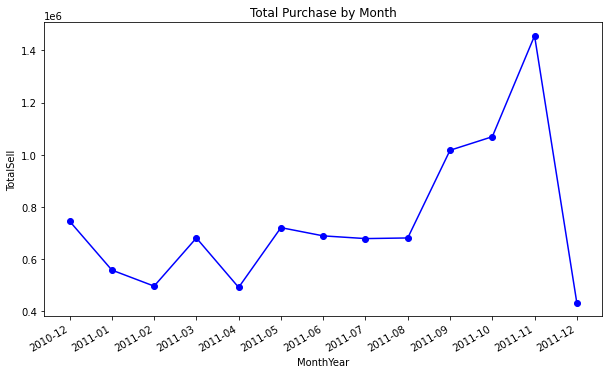

In [48]:
# Group the data by 'MonthYear' and calculate the total purchase for each month
monthly_data = cleaned_online_retail.groupby('MonthYear')['Totalsell'].sum().reset_index()

# Convert the 'MonthYear' column to string format for plotly
monthly_data['MonthYear'] = monthly_data['MonthYear'].astype(str)

# Set the figure size using subplots
fig, ax = plt.subplots(figsize=(10, 6)) # Width: 10 inches, Height: 5 inches

# Automatic formatting to the x-axis labels when dealing with dates. 
fig.autofmt_xdate()  

# Display the plot
plt.plot(monthly_data['MonthYear'], monthly_data['Totalsell'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Total Purchase by Month')
plt.xlabel('MonthYear')
plt.ylabel('TotalSell')

,Quantity,UnitPrice,Totalsell
Quantity,1.000000,-0.001261,0.889831
UnitPrice,-0.001261,1.000000,-0.162052
Totalsell,0.889831,-0.162052,1.000000


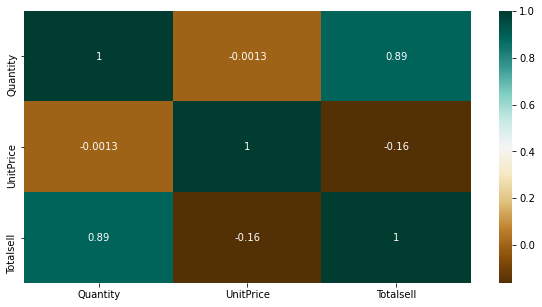

In [49]:
#We can use the Pandas method corr() to find the feature that is most correlated with TotalPurchase.
plt.figure(figsize=(10,5))
corr = cleaned_online_retail.corr()
sns.heatmap(corr,cmap="BrBG",annot=True)
corr

## Task 5: Analyze the Sales Trends over Time

In [51]:
# Extract the month from the 'InvoiceDate'
cleaned_online_retail['Month'] = cleaned_online_retail['InvoiceDate'].dt.month

# Extract the day of the week from the 'InvoiceDate'
cleaned_online_retail['DayOfWeek'] = cleaned_online_retail['InvoiceDate'].dt.day_name()

# Calculate total sales for each month
monthly_sales = cleaned_online_retail.groupby('Month')['Totalsell'].sum()

# Calculate total sales for each day of the week
daily_sales = cleaned_online_retail.groupby('DayOfWeek')['Totalsell'].sum()

# Identify the busiest month
busiest_month = monthly_sales.idxmax()

# Identify the busiest day of the week
busiest_day = daily_sales.idxmax()

# Print the results
print('\033[1m' + "Busiest Month (in terms of sells):" +'\033[0m', busiest_month)
print('\033[1m' + "Busiest Day of the Week (in terms of sales):" +'\033[0m', busiest_day)

Busiest Month (in terms of sells): 11
Busiest Day of the Week (in terms of sales): Thursday


#### We can plot a bar graph to visualize the sales trend by the day of the week. The busiest day of the week will have the highest bar on the graph. The x-axis represents the days of the week, and the y-axis represents the total sell amount for each day.



Text(0.5, 1.0, 'Sales Trend by Day of Week')

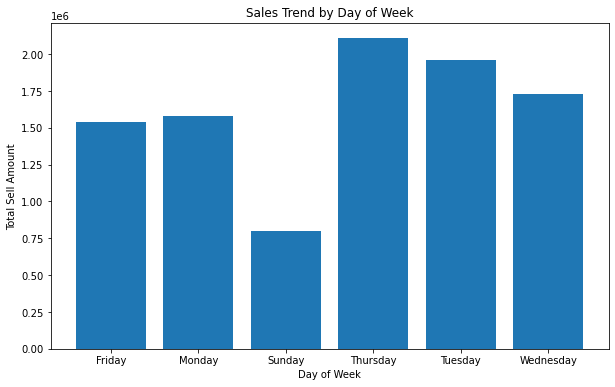

In [53]:
plt.figure(figsize=(10, 6))
plt.bar(daily_sales.index, daily_sales.values)
plt.xlabel('Day of Week')
plt.ylabel('Total Sell Amount')
plt.title('Sales Trend by Day of Week')

#### Knowing your top customers is essential for several reasons, as they play a crucial role in the success and growth of your business. Understanding and prioritizing top customers can lead to improved customer satisfaction, increased revenue, and better long-term business relationships.

In [54]:
# Calculate the total purchase amount for each customer
customer_total_purchase = cleaned_online_retail.groupby('CustomerID')['Totalsell'].sum()

# Sort the customers based on the total purchase amount in descending order
most_valuable_customers = customer_total_purchase.sort_values(ascending=False)

# Convert the Series to a DataFrame
most_valuable_customers_df = pd.DataFrame(most_valuable_customers, columns=['Totalsell']).reset_index()

# Count the total number of customers
total_customers = cleaned_online_retail['CustomerID'].nunique()

# Print the total number of customers and the top 10 customers
print('\033[1m' + f"Among {total_customers} customers, the top 10 customers are:" +'\033[0m', list(most_valuable_customers_df['CustomerID'][:10]))

Among 4373 customers, the top 10 customers are: ['Unknown', 14646.0, 18102.0, 17450.0, 14911.0, 12415.0, 14156.0, 17511.0, 16684.0, 13694.0]


## Task 6: Top-selling Products and Countries
###### Understanding the performance of products and sales in different regions can lead to better decision-making, improved marketing strategies, and overall business growth

In [55]:
# Find most valualble Items in the list
items_total_sell = cleaned_online_retail.groupby('Description')['Totalsell'].sum()

# Sort the items based on the total sells in ascending order
most_valuable_items = items_total_sell.sort_values(ascending=False)

# Convert the Series to a DataFrame
most_valuable_items_df = pd.DataFrame(most_valuable_items, columns=['Totalsell']).reset_index()

# Count the total number of items
total_items = cleaned_online_retail['Description'].nunique()

# Print the total number of Items and the top 10 items
print('\033[1m' + f"Among {total_items} items, the 10 most valuable items are:" +'\033[0m', list(most_valuable_items_df['Description'][:10]))

Among 4223 items, the 10 most valuable items are: ['DOTCOM POSTAGE', 'REGENCY CAKESTAND 3 TIER', 'WHITE HANGING HEART T-LIGHT HOLDER', 'PARTY BUNTING', 'JUMBO BAG RED RETROSPOT', 'RABBIT NIGHT LIGHT', 'POSTAGE', "PAPER CHAIN KIT 50'S CHRISTMAS ", 'ASSORTED COLOUR BIRD ORNAMENT', 'CHILLI LIGHTS']


In [58]:
# Find country with most sells in the list
countrywise_sell = cleaned_online_retail.groupby('Country')['Totalsell'].sum()

# Sort countries based on the total sells in ascending order
top_selling_country = countrywise_sell.sort_values(ascending=False)

# Convert the Series to a DataFrame
top_selling_country_df = pd.DataFrame(top_selling_country, columns=['Totalsell']).reset_index()

# Count the total countries
total_countries = cleaned_online_retail['Country'].nunique()

# Print the total countries and the top 10 countries
print('\033[1m' + f"Among {total_countries} countries, the top 10 selling countries are:" +'\033[0m', list(top_selling_country_df['Country'][:10]))


Among 38 countries, the top 10 selling countries are: ['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France', 'Australia', 'Switzerland', 'Spain', 'Belgium', 'Sweden']


##### Here, knowing the most valuable items ('DOTCOM POSTAGE', 'REGENCY CAKESTAND 3 TIER','PARTY BUNTING'....) and top selling countries ('United Kingdom', 'Netherlands', 'EIRE'...), we can make data-driven decisions, optimize operations, and stay competitive in the market. It provides critical insights into customer behavior, market trends, and business performance, allowing companies to better serve their customers and achieve long-term success.

## Task 7: Identify any Outliers or Anomalies in the Dataset

###### An outlier refers to a data point or a group of points that deviate significantly from the rest of the data. These outliers can be unusually high or low values. Detecting and handling outliers is crucial as they can adversely impact the accuracy of statistical models and analyses. Therefore, it is recommended to identify and remove outliers from the dataset. One effective technique for outlier detection is the Z-Score method.

###### Often outliers can be seen with visualizations using a box plot. Shown below is the box plot of Totalsell, you can find some points are outside the box they are none other than outliers.

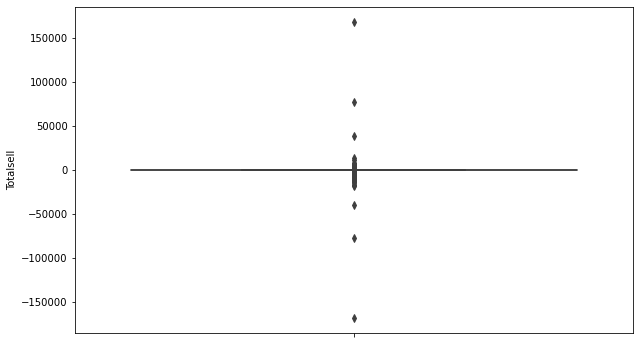

In [62]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_online_retail, y='Totalsell')

# Display the plot
plt.show()

#### The Z-Score measures how many standard deviations a data point is from the mean, beyond a threshold (e.g., Z-Score > 3) as potential outliers.

In [63]:
from scipy import stats

# Calculate the Z-Score for the 'Quantity' column
z_scores = stats.zscore(cleaned_online_retail['Totalsell'])

# Create a boolean mask to identify outliers (both positive and negative Z-scores)
threshold = 3
outlier_mask = abs(z_scores) > threshold

# Extract outliers from the DataFrame
outliers = cleaned_online_retail[outlier_mask]

outliers.shape

(396, 10)

In [64]:
# Remove outliers from the main dataset
without_outliers_online_retail = cleaned_online_retail[~outlier_mask]

# Statistical Summary of data without outliers
without_outliers_online_retail.describe()

,Quantity,UnitPrice,Totalsell,Month
count,534136.000000,534136.000000,534136.000000,534136.000000
mean,9.408417,3.813369,17.671839,7.549877
std,47.548170,15.533642,44.696246,3.508392
min,-9600.000000,0.000000,-1126.000000,1.000000
25%,1.000000,1.250000,3.750000,5.000000
50%,3.000000,2.080000,9.900000,8.000000
75%,10.000000,4.130000,17.400000,11.000000
max,12540.000000,1154.670000,1158.000000,12.000000


In [65]:
# Statistical Summary of data with outliers
cleaned_online_retail.describe() 

,Quantity,UnitPrice,Totalsell,Month
count,534532.000000,534532.000000,534532.000000,534532.000000
mean,9.701713,4.644063,18.184379,7.550111
std,218.789309,97.424304,381.403007,3.508284
min,-80995.000000,-11062.060000,-168469.600000,1.000000
25%,1.000000,1.250000,3.750000,5.000000
50%,3.000000,2.080000,9.900000,8.000000
75%,10.000000,4.130000,17.400000,11.000000
max,80995.000000,38970.000000,168469.600000,12.000000


#### With Outliers (std = 218) and Without Outliers (std = 50)¶
#### The significant difference in standard deviation implies that the outliers have a substantial impact on the overall variability of the data. Removing the outliers has resulted in a more focused and less variable dataset.

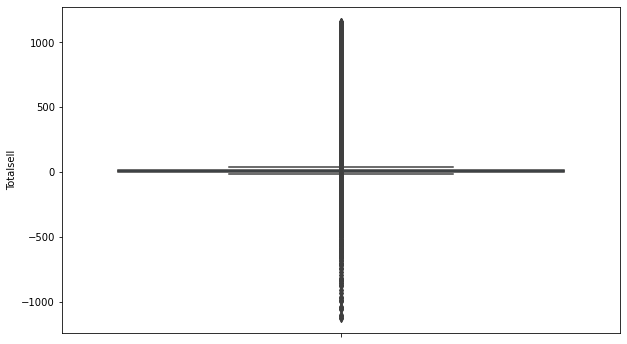

In [67]:
# Create a box plot of without_outliers_online_retail data
plt.figure(figsize=(10, 6))
sns.boxplot(data=without_outliers_online_retail, y='Totalsell')

# Display the plot
plt.show()

#### While considering the context of the data and the goals of the analysis we can not remove the outliers as it will have potential implications on the analysis. Here outliers might represents valuable or rare events that may carry essential information, which might impact the results of overall analysis.